<a href="https://colab.research.google.com/github/Manojusilla/manoj/blob/main/assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000        

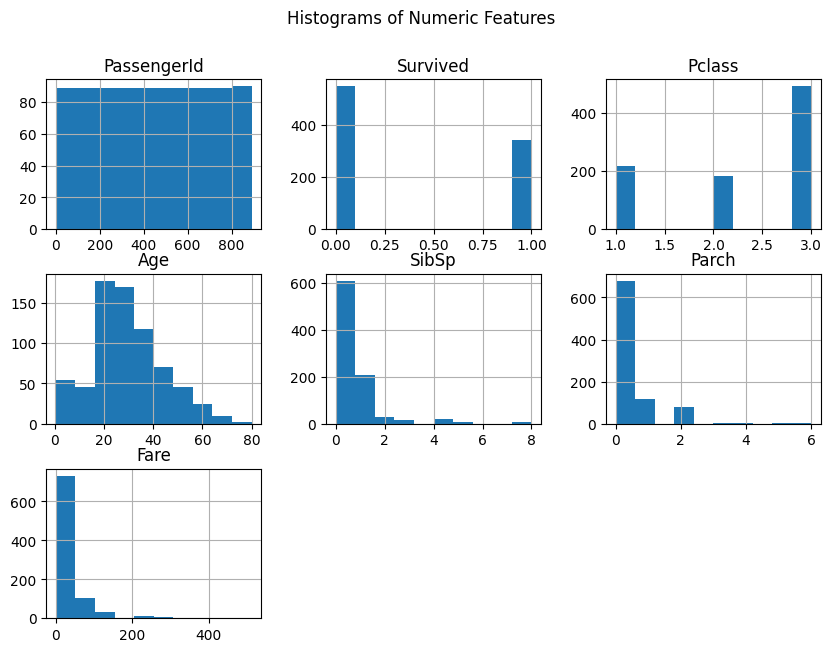

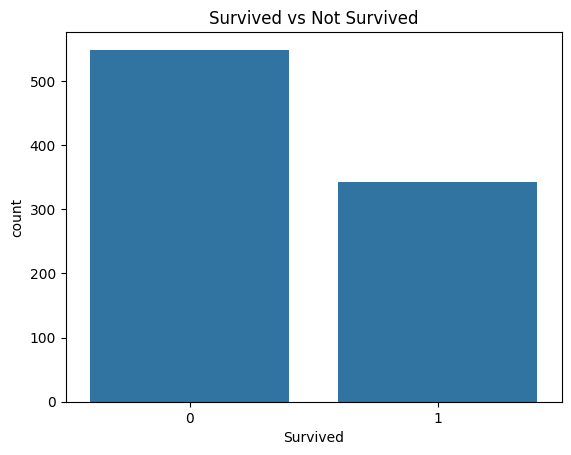

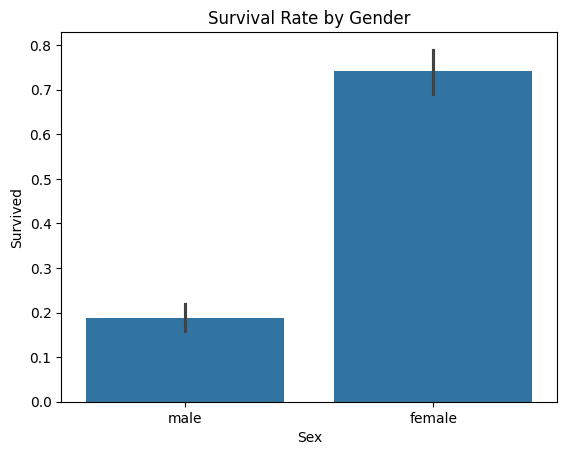

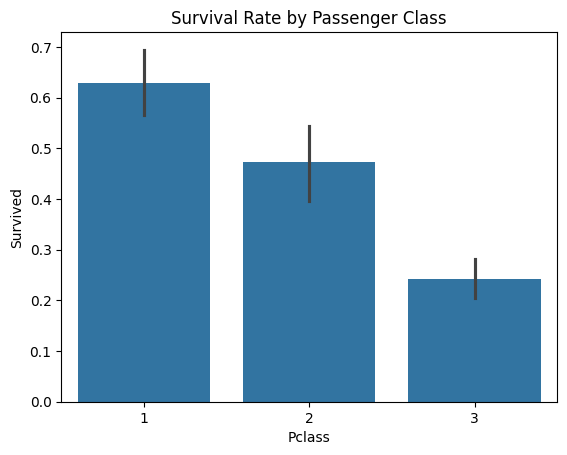

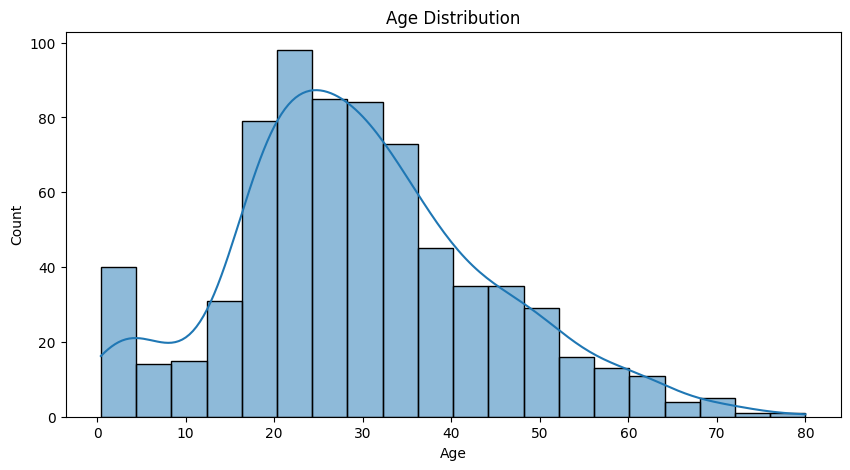

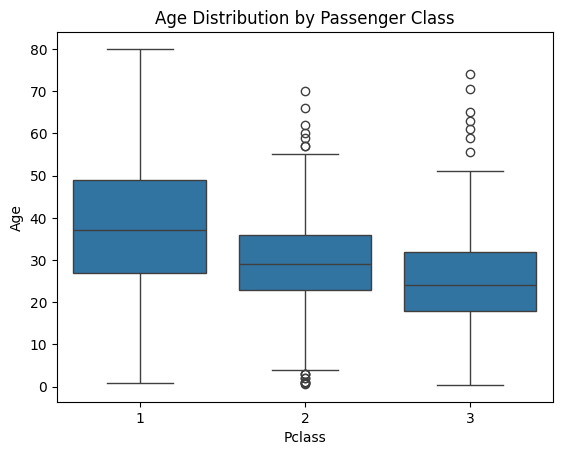

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print("Data Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe(include='all'))
print("\nColumn Names:\n", df.columns)
df.hist(figsize=(10, 7))
plt.suptitle('Histograms of Numeric Features')
plt.show()
sns.countplot(x='Survived', data=df)
plt.title('Survived vs Not Survived')
plt.show()
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()
df['Age'].fillna(df['Age'].median(), inplace=True)
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df.to_csv('cleaned_titanic.csv', index=False)


F1 Score: 0.7641509433962265


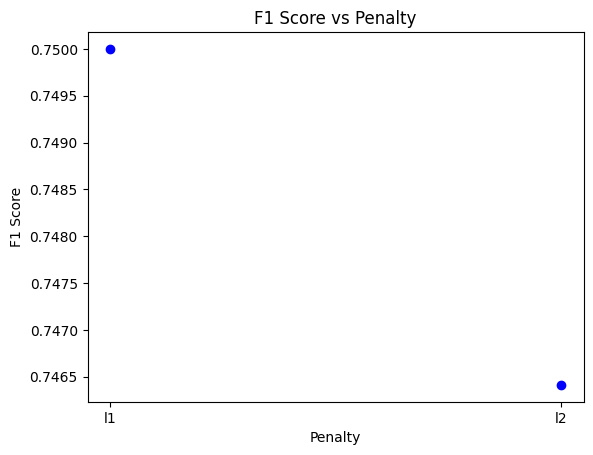

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer # Importing the SimpleImputer class for imputation

# Load the cleaned dataset
df = pd.read_csv('cleaned_titanic.csv')

# Define features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the imputer to replace missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the training data
X_train = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test = imputer.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(f"\nF1 Score: {f1}")

# Plot F1 Score as a Function of Penalty
penalties = ['l1', 'l2']
f1_scores = []

for penalty in penalties:
    model = LogisticRegression(penalty=penalty, solver='saga', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

# Plotting
plt.scatter(penalties, f1_scores, color='blue')
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Penalty')
plt.show()